# <span style="color:blue">Desafío 7-  Preprocesamiento de datos</span>

## <span style="color:orange">1.- Importación de librerías - Cargar, visualizar y analizar la data</span>

In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, chi2, f_classif, SequentialFeatureSelector
from sklearn.linear_model import LassoCV, LinearRegression, LogisticRegression
from statsmodels.api import OLS, add_constant
from scipy.stats import f_oneway
from scipy.stats import chi2,  chi2_contingency

# Cargar el archivo 'imdb_anime.xlsx'
file_path = r"C:\Users\atapi\Documents\DATA SCIENCE\Modulo 5-ML\aplicando lo aprendido I\desafio 7\Apoyo Desafío - Preprocesamiento de datos\imdb_anime.xlsx"
anime_data = pd.read_excel(file_path)

# Análisis inicial de los datos
print("\n--- Vista previa de los datos ---")
anime_data.head()  # Mostrar las primeras filas



--- Vista previa de los datos ---


,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
0,One Piece,"Animation, Action, Adventure",8.9,187689,24 min,(1999– ),Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",TV-14,NaN,187689,0,NaN
1,Teenage Mutant Ninja Turtles: Mutant Mayhem,"Animation, Action, Adventure",7.4,28895,99 min,-2023,The film follows the Turtle brothers as they w...,NaN,PG,74,28895,0,NaN
2,The Super Mario Bros. Movie,"Animation, Adventure, Comedy",7.1,189108,92 min,-2023,A plumber named Mario travels through an under...,NaN,PG,46,189108,0,NaN
3,Attack on Titan,"Animation, Action, Adventure",9.1,434457,24 min,(2013–2023),After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",TV-MA,NaN,434457,0,NaN
4,Jujutsu Kaisen,"Animation, Action, Adventure",8.5,82909,24 min,(2020– ),A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",TV-MA,NaN,82909,0,NaN


In [47]:
print("\n--- Información general del DataFrame ---")
anime_data.info()  # Resumen de tipos de datos y valores nulos


--- Información general del DataFrame ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45717 entries, 0 to 45716
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            45717 non-null  object
 1   Genre            45717 non-null  object
 2   User Rating      25009 non-null  object
 3   Number of Votes  25009 non-null  object
 4   Runtime          32549 non-null  object
 5   Year             45591 non-null  object
 6   Summary          23547 non-null  object
 7   Stars            13676 non-null  object
 8   Certificate      28694 non-null  object
 9   Metascore        341 non-null    object
 10  Gross            25009 non-null  object
 11  Episode          45717 non-null  object
 12  Episode Title    34910 non-null  object
dtypes: object(13)
memory usage: 4.5+ MB


In [48]:
print("\n--- Resumen estadístico de las variables numéricas ---")
anime_data.describe()


--- Resumen estadístico de las variables numéricas ---


,Title,Genre,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,Episode,Episode Title
count,45717,45717,25009.0,25009,32549,45591,23547,13676,28694,341,25009,45717,34910
unique,9851,201,87.0,3033,196,740,22588,6460,33,60,3033,3,33779
top,Doraemon,"Animation, Action, Adventure",7.6,7,24 min,(1969– ),A young teen who surfs the skies with his ref ...,"Nobuyo Ôyama,Noriko Ohara,Michiko Nomura,Kazuy...",TV-14,74,7,1,Episode #1.4
freq,2758,13568,1270.0,567,9636,2399,25,765,10033,21,567,34909,12


            Columna  Valores Faltantes  Proporción (%)
0         Metascore              45376       99.254107
1             Stars              32041       70.085526
2           Summary              22170       48.493996
3       User Rating              20708       45.296061
4   Number of Votes              20708       45.296061
5             Gross              20708       45.296061
6       Certificate              17023       37.235602
7           Runtime              13168       28.803290
8     Episode Title              10807       23.638909
9              Year                126        0.275609
10            Title                  0        0.000000
11            Genre                  0        0.000000
12          Episode                  0        0.000000


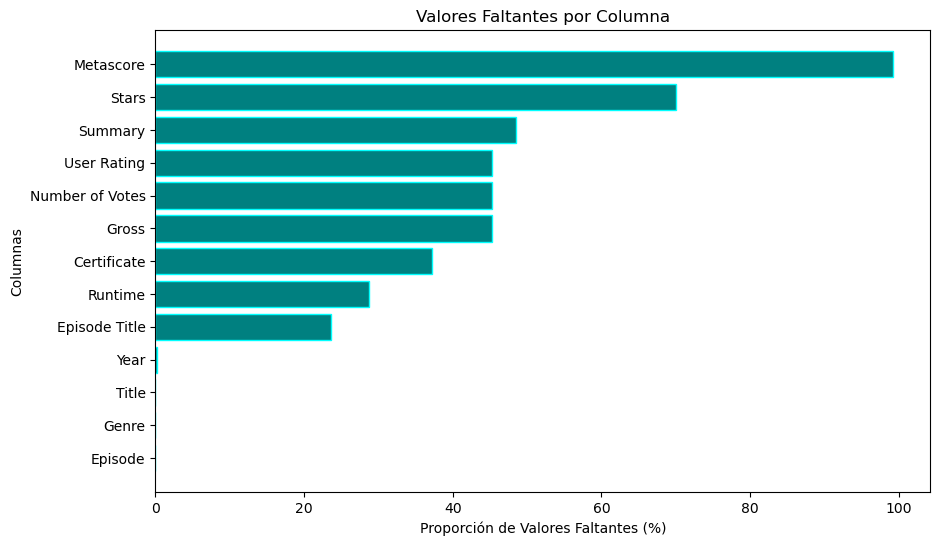

In [49]:
# Calcular valores faltantes y su proporción
valores_nulos = anime_data.isnull().sum()
porcentaje_nulos = (valores_nulos / len(anime_data)) * 100

# Crear un DataFrame para combinar los datos
tabla_faltantes = pd.DataFrame({
    'Columna': valores_nulos.index,
    'Valores Faltantes': valores_nulos.values,
    'Proporción (%)': porcentaje_nulos.values})

# Ordenar por proporción de valores faltantes, de mayor a menor
tabla_faltantes = tabla_faltantes.sort_values(by='Proporción (%)', ascending=False)

# Restablecer el índice para claridad
tabla_faltantes.reset_index(drop=True, inplace=True)

# Mostrar la tabla
print(tabla_faltantes)

plt.figure(figsize=(10, 6))
plt.barh(tabla_faltantes['Columna'], tabla_faltantes['Proporción (%)'], color='teal', edgecolor='cyan')
plt.xlabel('Proporción de Valores Faltantes (%)')
plt.ylabel('Columnas')
plt.title('Valores Faltantes por Columna')
plt.gca().invert_yaxis()
plt.show()

**<span style="color:purple">Análisis inicial del conjunto de datos</span>**

**Resumen de las variables:** El dataset contiene 45717 registros y 13 columnas. Estas son las principales características:
- Muchas columnas tienen valores faltantes, lo que afectará los análisis posteriores:
    - *User Rating y Number of Votes*: 20708 valores faltantes.
    - *Runtime*: 13168 valores faltantes.
    - *Year*: 126 valores faltantes.
    - *Summary, Stars, Certificate, Metascore, Gross y Episode Title* tienen una cantidad considerable de datos faltantes.

**Proporción de valores faltantes por columna:**
- *Metascore:* 99.25% faltantes (candidata para eliminación).
- *Stars:* 70.08% faltantes.
- *Summary:* 48.49% faltantes.
- *User Rating, Number of Votes, Gross:* 45.29% faltantes.
- *Runtime:* 28.80% faltantes.
- *Episode Title:* 23.64% faltantes.
  

**Algunas columnas presentan problemas de formato:**
- *Year*: Incluye valores entre paréntesis, rangos de años y guiones.
- *Runtime*: Mezcla valores numéricos y texto ("24 min", "99 min").
- *Metascore* tiene demasiados valores faltantes, por lo que podría ser candidata para eliminación.

**Pasos a seguir**
- Identificar y tratar valores faltantes y formatos inconsistentes.
- Visualizar las distribuciones de variables clave y revisar su contenido.
- Eliminar columnas con poca utilidad o alta proporción de datos faltantes.

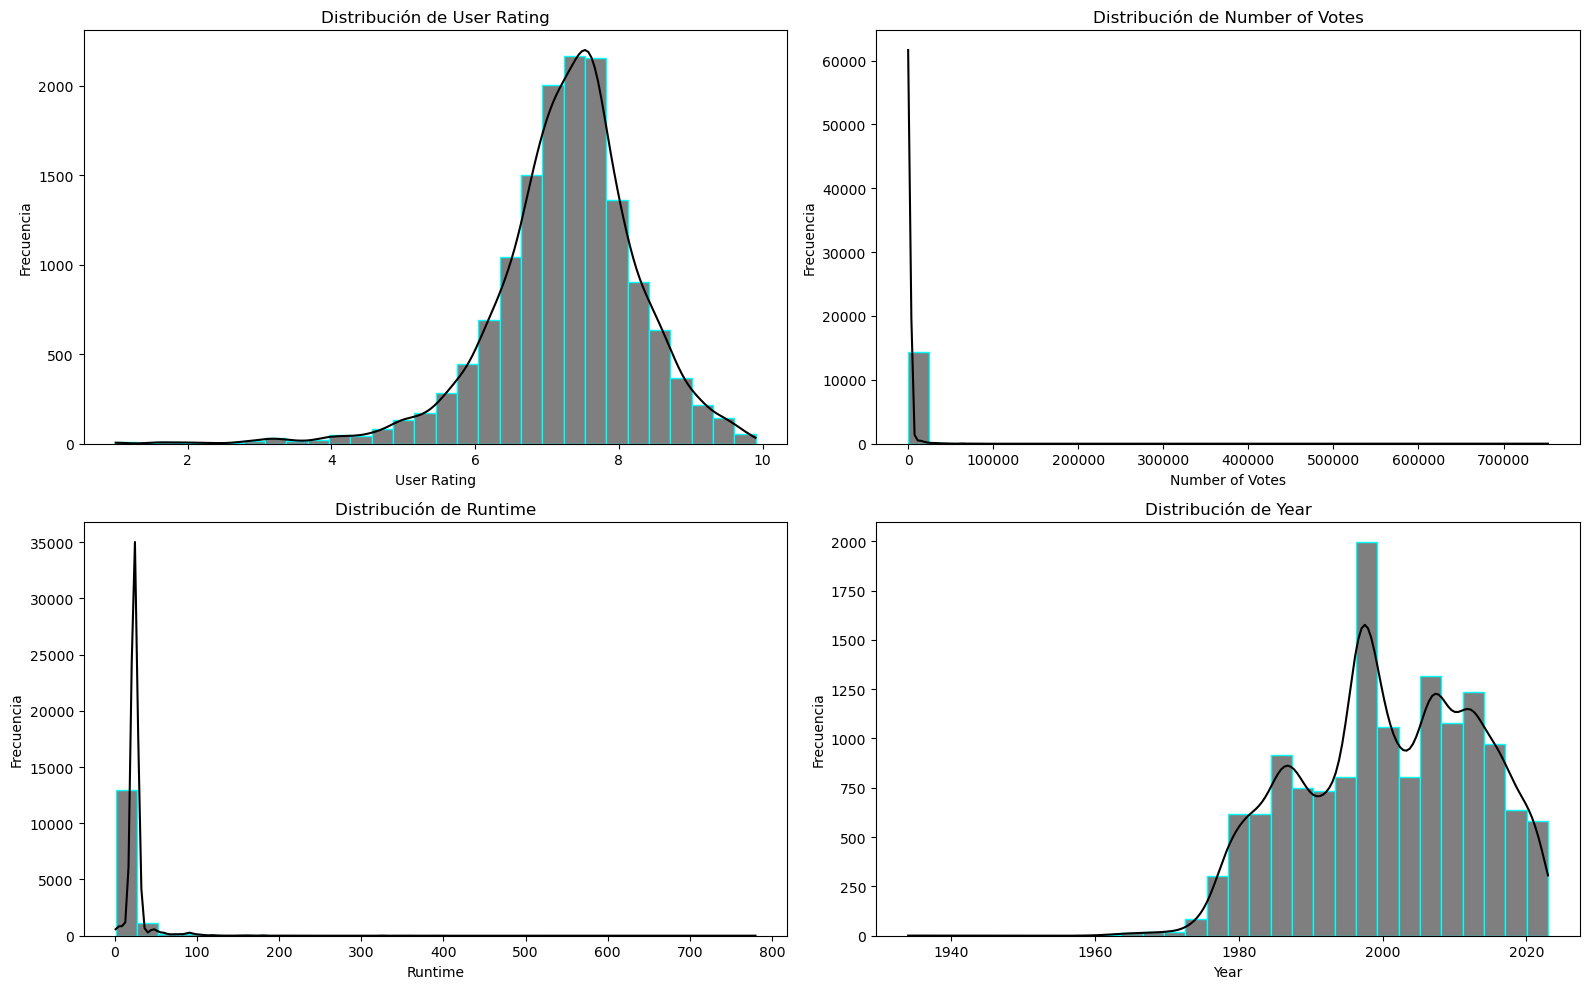

,User Rating,Number of Votes,Runtime,Year,Gross
count,14569.000000,14569.000000,14569.000000,14569.000000,14569.000000
mean,7.277637,1510.209692,26.639783,2000.821402,1510.209692
std,0.999477,14832.467466,24.068973,12.171508,14832.467466
min,1.000000,5.000000,1.000000,1934.000000,5.000000
25%,6.800000,20.000000,23.000000,1992.000000,20.000000
50%,7.400000,95.000000,24.000000,2000.000000,95.000000
75%,7.900000,403.000000,25.000000,2011.000000,403.000000
max,9.900000,752291.000000,780.000000,2023.000000,752291.000000


In [51]:
# Convertir datos de interés a numéricos y analizar su distribución
anime_data["User Rating"] = pd.to_numeric(anime_data["User Rating"], errors="coerce")
anime_data["Number of Votes"] = pd.to_numeric(anime_data["Number of Votes"], errors="coerce")
anime_data["Gross"] = pd.to_numeric(anime_data["Gross"], errors="coerce")  # Limpieza de columna Gross

# Asegurarse de que la columna Runtime sea de tipo string antes de extraer los minutos
if not anime_data["Runtime"].dtype == 'O':  # 'O' indica tipo objeto (strings)
    anime_data["Runtime"] = anime_data["Runtime"].astype(str)

# Extraer minutos de la columna Runtime y convertir a numérico
anime_data["Runtime"] = anime_data["Runtime"].str.extract(r"(\d+)").astype(float)

# Asegurarse de que la columna Year sea de tipo string antes de extraer el año
if not anime_data["Year"].dtype == 'O':
    anime_data["Year"] = anime_data["Year"].astype(str)

# Extraer el año de la columna Year y convertir a numérico
anime_data["Year"] = anime_data["Year"].str.extract(r"(\d{4})").astype(float)

# Eliminar filas con valores faltantes en columnas críticas
anime_data = anime_data.dropna(subset=["User Rating", "Number of Votes", "Runtime", "Year"])

# Revisar nuevamente datos básicos después de las conversiones
resumen_estadistico = anime_data.describe()

# Graficar distribuciones de las columnas numéricas más relevantes
plt.figure(figsize=(16, 10))
for i, column in enumerate(["User Rating", "Number of Votes", "Runtime", "Year"], start=1):
    plt.subplot(2, 2, i)
    sns.histplot(anime_data[column], kde=True, bins=30, color='black', edgecolor='cyan')
    plt.title(f"Distribución de {column}")
    plt.xlabel(column)
    plt.ylabel("Frecuencia")
plt.tight_layout()
plt.show()

resumen_estadistico


1. **Distribuciones observadas:**
   
- *User Rating:* Se observa una distribución unimodal normal con la mayoría de los valores entre 6 y 8.
- *Number of Votes:* Altamente sesgada hacia la izquierda, con valores extremos (outliers) que superan el millón.
- *Runtime:* Valores consistentes alrededor de 20-30 minutos, pero hay casos extremos con duraciones de hasta 780 minutos.
- *Year:* La mayoría de los datos están entre 1980 y 2020, con valores que se extienden hasta 2024.

---
---

**<span style="color:green">Propuesta de tratamiento para observaciones en variables</span>**

1. **Eliminar columnas con demasiados valores faltantes:** Si una columna tiene casi todos los valores faltantes (como Metascore, con el 99% faltante), su utilidad para el análisis es mínima y puede eliminarse.

2. **Tratar valores atípicos:** *Number of Votes y Runtime* tienen valores extremos que sesgan las distribuciones. La propuesta de tratamiento, es aplicar filtros o transformar las distribuciones (por ejemplo logaritmos) es un paso necesario para manejar esta anomalía.

3. **Lidiar con los faltantes en columnas clave:** Para columnas relevantes como *User Rating, Runtime y Year*, se deben considerar imputaciones (promedios, medianas, u otros métodos) o decisiones sobre la eliminación de filas con datos faltantes.

4. **Transformaciones iniciales:** Variables categóricas como *Genre y Certificate* deben ser codificadas en formatos numéricos o categóricos que sean procesables por modelos.

---
---

**<span style="color:purple">Visualizaciones adicionales</span>**

1. **Boxplots:**
   
- **User Rating:** Se observan valores atípicos por debajo de 4, pero la mayoría de las calificaciones están concentradas entre 6 y 8.
- **Number of Votes:** La mayoría de los datos están cerca de 0, pero existen valores extremos que superan ampliamente el millón, indicando un sesgo muy fuerte.
- **Runtime:** Duraciones normales entre 20 y 30 minutos, pero se presentan valores extremos que llegan a 780 minutos.
- **Year:** Distribución razonable, aunque con algunos valores fuera de lo esperado.
  
2. **Mapa de correlación:**
   
- Las correlaciones entre las variables numéricas son bajas:
- 
    - *User Rating* tiene una correlación débil con Year (0.13).
    - *Number of Votes* tiene una correlación baja con Runtime (0.16).
    - Esto sugiere que no hay relaciones lineales fuertes entre las variables numéricas principales.

---

**Conclusión:**
Con estas visualizaciones adicionales, el análisis exploratorio inicial está más completo. Los boxplots confirman la presencia de valores atípicos significativos en *Number of Votes y Runtime*, que requerirán tratamiento. El mapa de correlación indica que las variables numéricas no tienen relaciones fuertes entre sí.

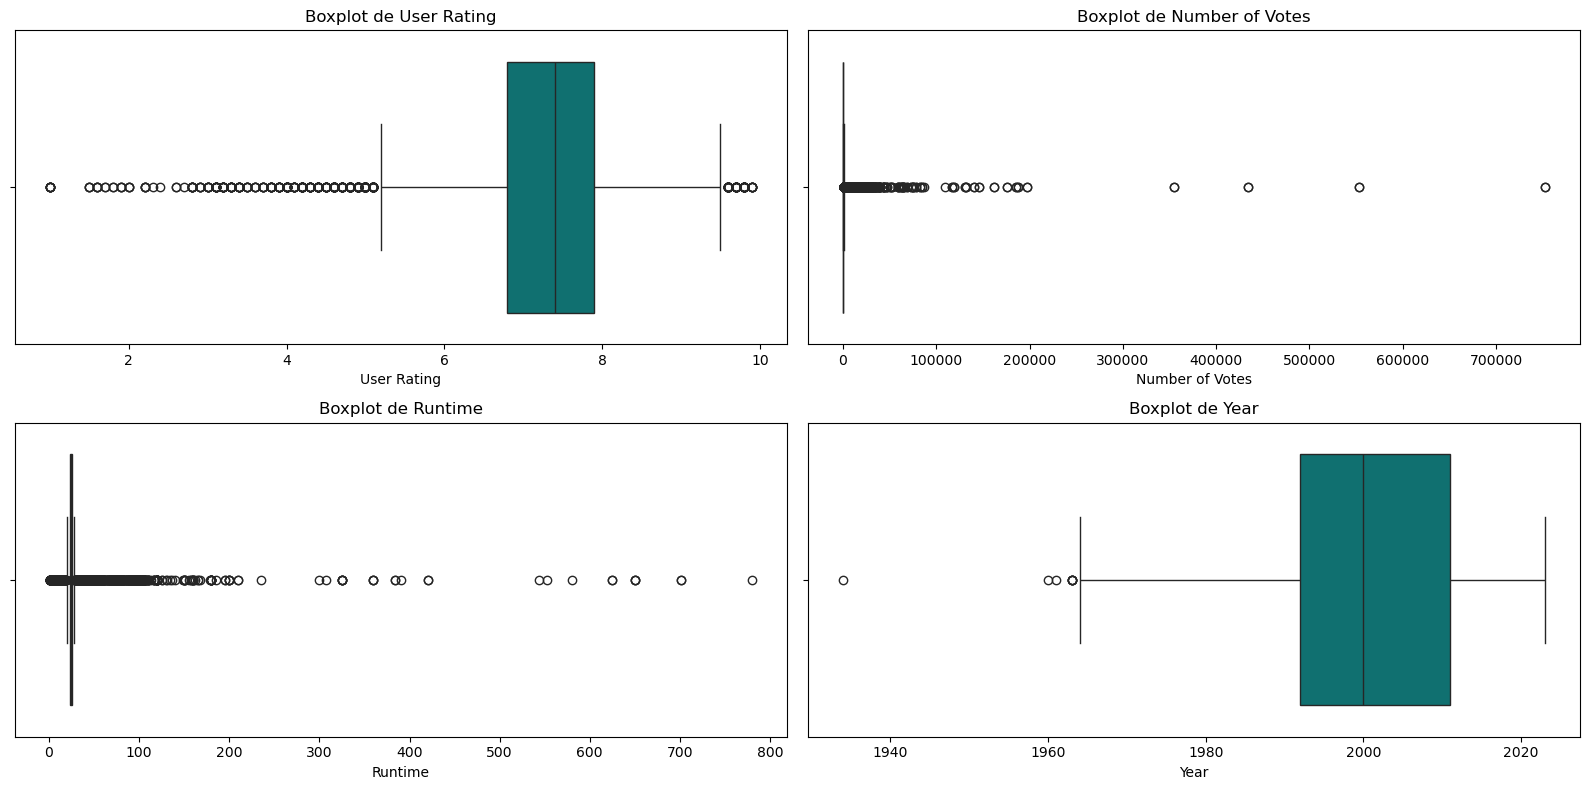

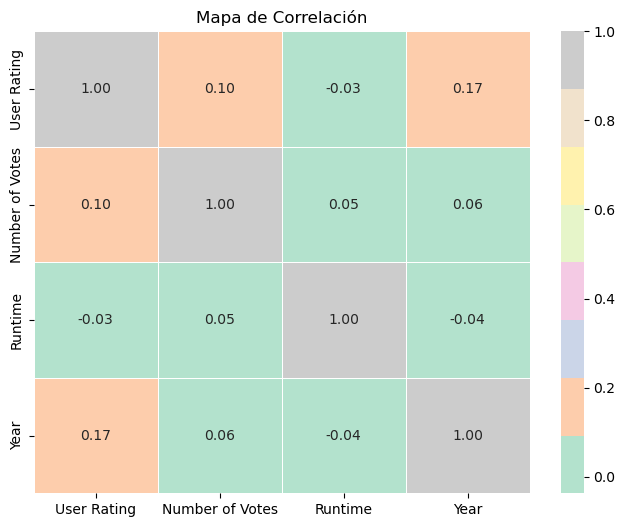

In [53]:
# Generar Boxplots para identificar valores atípicos
plt.figure(figsize=(16, 8))
for i, column in enumerate(["User Rating", "Number of Votes", "Runtime", "Year"], start=1):
    plt.subplot(2, 2, i)
    sns.boxplot(data=anime_data, x=column, color='teal')
    plt.title(f"Boxplot de {column}")
    plt.xlabel(column)
plt.tight_layout()
plt.show()

# Calcular y graficar mapa de correlación
correlation_matrix = anime_data[["User Rating", "Number of Votes", "Runtime", "Year"]].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="Pastel2", fmt=".2f", linewidths=0.5)
plt.title("Mapa de Correlación")
plt.show()


## <span style="color:orange">2.-Transformación inicial de los datos</span>

1. **Convertir columnas de texto a numéricas:**

- *User Rating, Number of Votes:* Ya las transformamos a numéricas previamente, pero verificaremos su integridad.
- *Year:* Confirmaremos la extracción del año.
- *Runtime:* Ya fue transformado extrayendo los minutos; se verificará el formato final.

2. **Transformar columnas categóricas:**

- *Genre:* Convertir las categorías en formato de variables dummy usando las recomendaciones.
- *Certificate:* Convertir en variables categóricas numéricas.
- *Episode:* Confirmar o convertir en binarian si es necesario.

3. **Pipeline y funciones reutilizables:**

- Crear un pipeline para aplicar transformaciones de forma modular.
- Incorporar funciones reutilizables para limpieza y transformación de columnas.

4. **Verificar la consistencia del dataset transformado:**
- Imprimir un resumen antes y después de aplicar los pasos.
- Asegurar que las transformaciones se reflejen correctamente.

In [55]:
# Función para transformar columnas numéricas
def convertir_a_numerico(df, columna, regex=None):
    if regex:
        df[columna] = df[columna].astype(str).str.extract(regex).astype(float)
    else:
        df[columna] = pd.to_numeric(df[columna], errors='coerce')
    return df

# Transformaciones individuales
# 1. Convertir User Rating y Number of Votes a numérico
anime_data = convertir_a_numerico(anime_data, "User Rating")
anime_data = convertir_a_numerico(anime_data, "Number of Votes")

# 2. Extraer minutos de Runtime
anime_data = convertir_a_numerico(anime_data, "Runtime", regex=r"(\d+)")

# 3. Extraer años de Year
anime_data = convertir_a_numerico(anime_data, "Year", regex=r"(\d{4})")

# 4. Transformar 'Genre' a variables dummy
generos_dummies = anime_data['Genre'].str.split(', ').str.join('|').str.get_dummies()
anime_data = pd.concat([anime_data, generos_dummies], axis=1).drop(columns=["Genre"])

# 5. Transformar 'Certificate' a variables categóricas numéricas
anime_data['Certificate'] = anime_data['Certificate'].astype('category').cat.codes

# Verificar las transformaciones
anime_data_info = anime_data.info()

anime_data_info
anime_data.head()

<class 'pandas.core.frame.DataFrame'>
Index: 14569 entries, 0 to 45716
Data columns (total 33 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            14569 non-null  object 
 1   User Rating      14569 non-null  float64
 2   Number of Votes  14569 non-null  float64
 3   Runtime          14569 non-null  float64
 4   Year             14569 non-null  float64
 5   Summary          12703 non-null  object 
 6   Stars            4333 non-null   object 
 7   Certificate      14569 non-null  int8   
 8   Metascore        16 non-null     object 
 9   Gross            14569 non-null  float64
 10  Episode          14569 non-null  object 
 11  Episode Title    11431 non-null  object 
 12  Action           14569 non-null  int64  
 13  Adventure        14569 non-null  int64  
 14  Animation        14569 non-null  int64  
 15  Biography        14569 non-null  int64  
 16  Comedy           14569 non-null  int64  
 17  Crime            

,Title,User Rating,Number of Votes,Runtime,Year,Summary,Stars,Certificate,Metascore,Gross,...,Horror,Music,Musical,Mystery,Romance,Sci-Fi,Short,Sport,Thriller,War
0,One Piece,8.9,187689.0,24.0,1999.0,Follows the adventures of Monkey D. Luffy and ...,"Mayumi Tanaka,Laurent Vernin,Akemi Okamura,Ton...",18,NaN,187689.0,...,0,0,0,0,0,0,0,0,0,0
3,Attack on Titan,9.1,434457.0,24.0,2013.0,After his hometown is destroyed and his mother...,"Josh Grelle,Bryce Papenbrook,Yûki Kaji,Yui Ish...",20,NaN,434457.0,...,0,0,0,0,0,0,0,0,0,0
4,Jujutsu Kaisen,8.5,82909.0,24.0,2020.0,A boy swallows a cursed talisman - the finger ...,"Junya Enoki,Yûichi Nakamura,Adam McArthur,Yuma...",20,NaN,82909.0,...,0,0,0,0,0,0,0,0,0,0
5,Bleach: Thousand-Year Blood War,9.1,28587.0,24.0,2022.0,The peace is suddenly broken when warning sire...,"Johnny Yong Bosch,Masakazu Morita,Stephanie Sh...",20,NaN,28587.0,...,0,0,0,0,0,0,0,0,0,0
6,Demon Slayer: Kimetsu no Yaiba,8.6,131667.0,24.0,2019.0,A family is attacked by demons and only two me...,"Natsuki Hanae,Zach Aguilar,Abby Trott,Akari Kitô",18,NaN,131667.0,...,0,0,0,0,0,0,0,0,0,0


**<span style="color:purple">Transformaciones realizadas para el punto 2</span>**

- **Columnas numéricas:**

    - *User Rating, Number of Votes, Runtime, y Year* se transformaron correctamente a formato numérico.
    - Se extrajeron valores relevantes mediante expresiones regulares donde fue necesario.

- **Columnas categóricas:**

    - *Genre* se convirtió en variables dummy, creando 26 nuevas columnas (una por género).
    - *Certificate* fue transformada a valores categóricos codificados numéricamente.

**Dataset resultante:**
- El dataset tiene ahora 38 columnas (incluyendo las dummies de género).
- Las columnas transformadas están listas para su análisis.

## <span style="color:orange">3.-Revisión de outliers</span>

Dado el contexto de los datos procesados y las características analizadas, el método más adecuado entre IQR (Rango Intercuartil) y Z-score depende de la naturaleza de los datos y los objetivos específicos:

1. **Método IQR (Rango Intercuartil)**
   
- Es ideal para detectar outliers en datos que no necesariamente siguen una distribución normal.
- Más robusto frente a valores extremos, ya que se basa en los percentiles (Q1 y Q3), que no son afectados significativamente por datos atípicos.
- Es el método recomendado si no tienes evidencia clara de que los datos siguen una distribución normal.
  
2. **Método Z-score**

- Es adecuado cuando los datos siguen una distribución normal o aproximadamente normal.
- Se basa en la desviación estándar, lo que puede hacer que sea sensible a valores extremos en datos que no estén normalmente distribuidos.
- Si los datos tienen una distribución simétrica y normal, este método es más efectivo.

**<span style="color:olive">Recomendación para los datos procesados:</span>**

**Dado que los datos provienen de múltiples transformaciones y columnas como "User Rating", "Number of Votes" y "Runtime" suelen tener distribuciones sesgadas, el método IQR sería más robusto y menos sensible a los valores extremos, especialmente porque no asume una distribución normal.**



In [57]:
def detectar_outliers(df, column, threshold=1.5):
    """
    Detecta valores atípicos en una columna numérica utilizando el método IQR.

    Parámetros:
    - df: DataFrame
    - column: Nombre de la columna a analizar
    - threshold: Umbral para identificar valores atípicos (1.5 por defecto).

    Retorna:
    - DataFrame con los valores atípicos.
    """
    # Cálculo de IQR
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR

    # Identificar outliers
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

# Aplicar la función a una variable numérica como ejemplo
outliers_iqr = detectar_outliers(anime_data, "User Rating", threshold=1.5)

# Contar el número de valores atípicos
num_outliers_iqr = len(outliers_iqr)

print(f"Cantidad de outliers identificados en 'User Rating' (IQR): {num_outliers_iqr}")


Cantidad de outliers identificados en 'User Rating' (IQR): 520


**<span style="color:purple">Análisis</span>**

**Usamos el método IQR (Rango Intercuartil) para identificar valores atípicos en la columna "User Rating".**

1. **Resultado**

- El análisis identificó 520 valores atípicos en la columna "User Rating".
- Estos valores representan observaciones que se alejan significativamente de la mayoría de las puntuaciones de usuario registradas en el dataset.

2. **Interpretación**

- **Número elevado de outliers:** La presencia de 520 valores atípicos indica que una proporción considerable de las puntuaciones de usuario están fuera del rango típico definido por el método IQR.

- **Causa potencial:**

    - **Distribución sesgada:** Si la distribución de "User Rating" tiene colas largas o un comportamiento asimétrico, es más probable que se identifiquen valores extremos.
    - **Errores en los datos:** Podrían existir puntuaciones registradas incorrectamente o inconsistencias en los datos.
- **Naturaleza del fenómeno:** Algunos animes podrían tener puntuaciones excepcionalmente altas o bajas debido a su popularidad o calidad percibida, lo que podría ser real y no un error.

3. **Acciones Recomendadas**
   
- **Mantener o eliminar outliers:**

    - **Eliminar outliers:** Si estos valores representan ruido o errores en los datos, eliminarlos podría mejorar la precisión del análisis.
    - **Mantener outliers:** Si los valores extremos reflejan la realidad del fenómeno (como puntuaciones genuinamente altas o bajas), es mejor conservarlos para no perder información.

- **Transformar la variable:** Si la distribución de la variable es muy sesgada, aplicar una transformación logarítmica o similar podría ayudar a reducir el impacto de los outliers.

- **Explorar los outliers:** Analizar los datos identificados como outliers para entender su naturaleza, como por ejemplo, verificar si están asociados a animes específicos.

---

## <span style="color:orange">4.-Transformación de variables finales</span>

**Plan para el punto 4:** 

1. **Análisis de distribuciones:**

- Revisar distribuciones de variables relevantes después del filtrado.
- Identificar si alguna variable se beneficiaría de transformaciones como el logaritmo para reducir sesgos.

2. **Transformaciones:**

- Aplicar transformaciones logarítmicas a variables numéricas sesgadas como *Number of Votes y Runtime*.
- Asegurarnos de que las variables categóricas (como Certificate) estén codificadas adecuadamente usando get_dummies o categorización numérica.

3. **Estrategia para valores nulos:**

- Revisar valores nulos en el dataset filtrado.
- Imputar valores nulos o eliminar filas según el impacto en el análisis.

4. **Crear nuevas variables:** Proponer y generar al menos dos nuevas características derivadas que puedan ser útiles para el análisis.

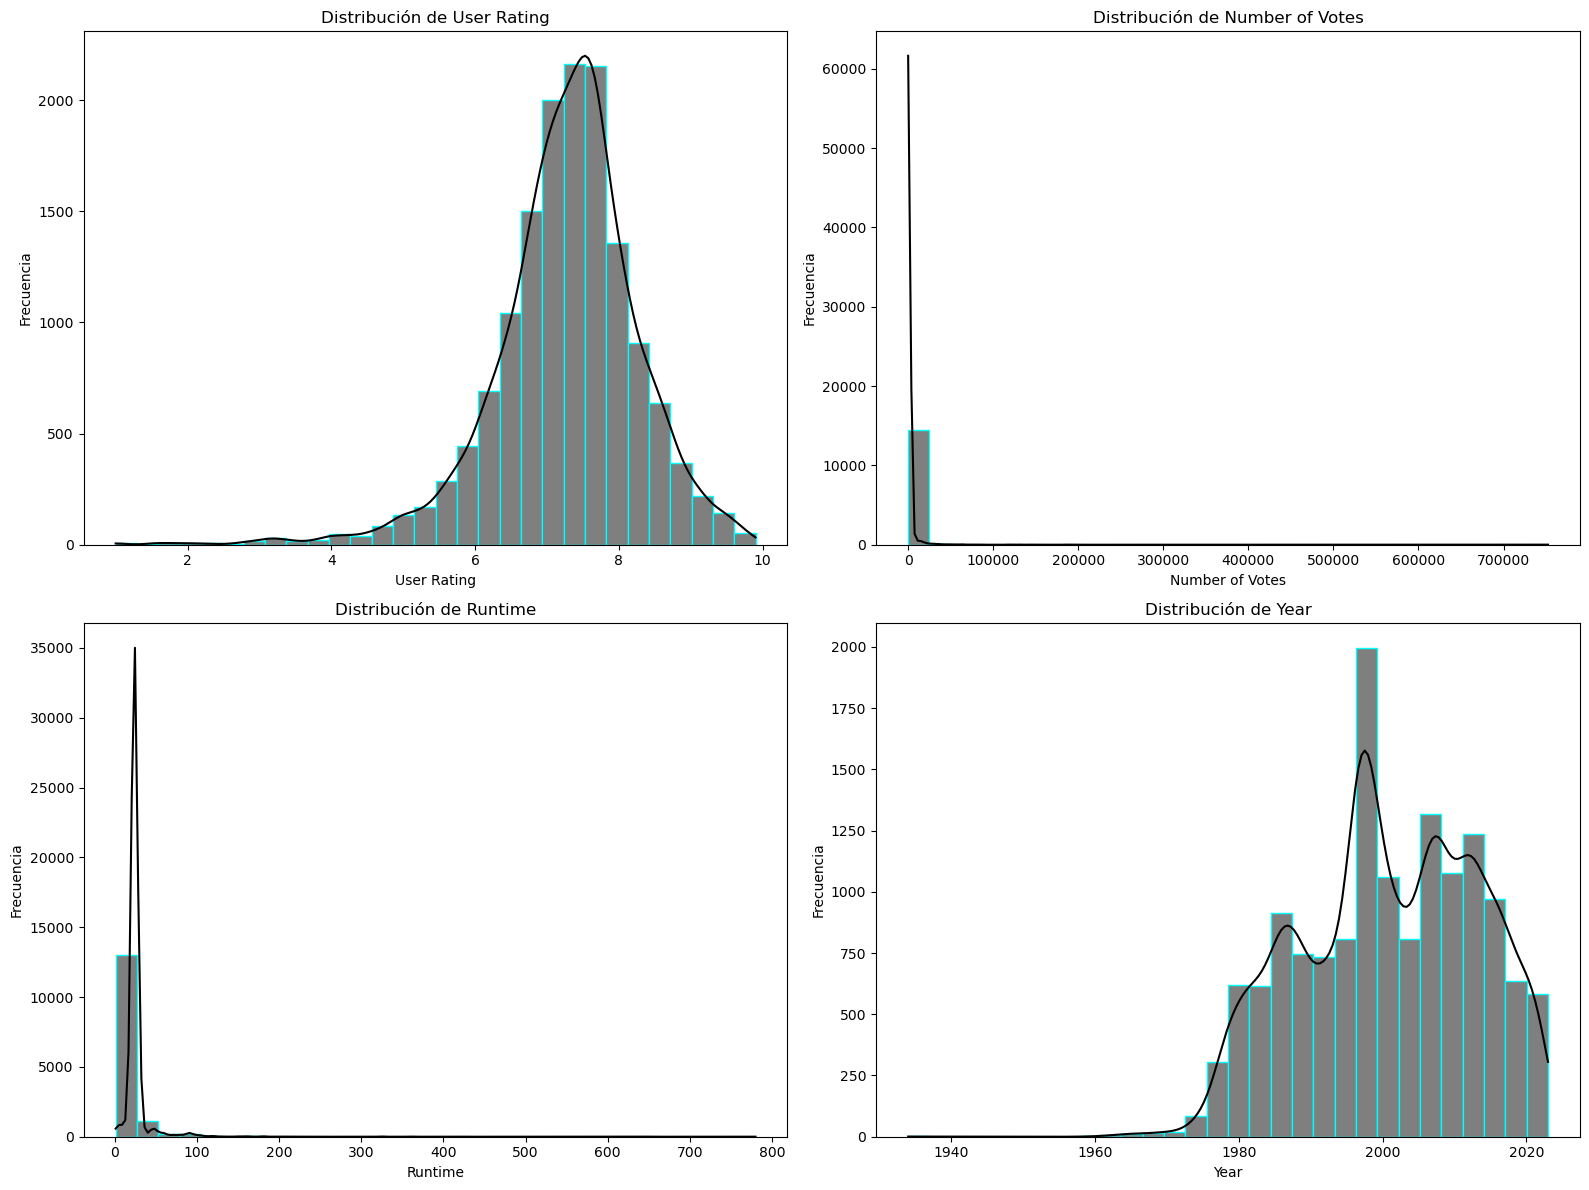


--- Resumen del dataset después de las transformaciones ---
<class 'pandas.core.frame.DataFrame'>
Index: 14569 entries, 0 to 45716
Data columns (total 65 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Title                  14569 non-null  object 
 1   User Rating            14569 non-null  float64
 2   Number of Votes        14569 non-null  float64
 3   Runtime                14569 non-null  float64
 4   Year                   14569 non-null  float64
 5   Summary                12703 non-null  object 
 6   Stars                  4333 non-null   object 
 7   Metascore              16 non-null     object 
 8   Gross                  14569 non-null  float64
 9   Episode                14569 non-null  object 
 10  Episode Title          11431 non-null  object 
 11  Action                 14569 non-null  int64  
 12  Adventure              14569 non-null  int64  
 13  Animation              14569 non-null  int64  
 14

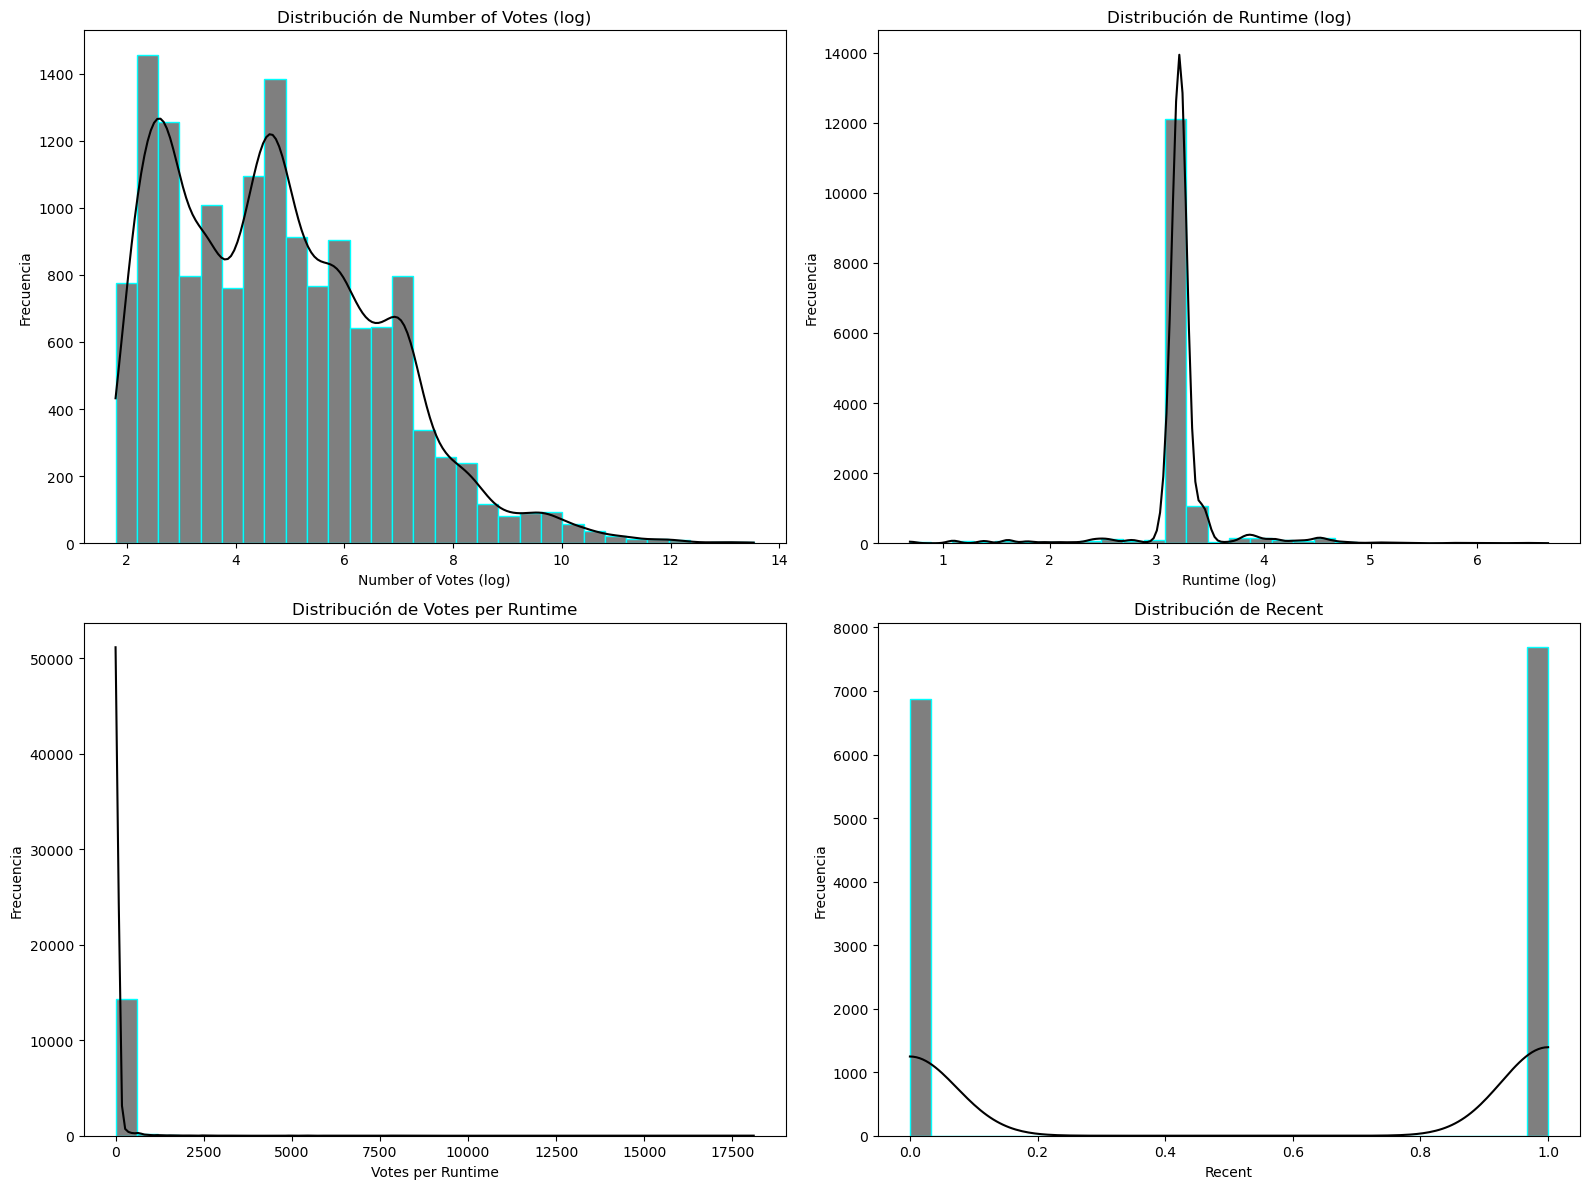

In [59]:
# Transformaciones iniciales y logarítmicas

# Revisar distribuciones de variables relevantes
def graficar_distribuciones(df, columnas):
    """Grafica las distribuciones de las columnas numéricas."""
    plt.figure(figsize=(16, 12))
    for i, column in enumerate(columnas, start=1):
        plt.subplot(2, 2, i)
        sns.histplot(df[column], kde=True, bins=30, color='black', edgecolor='cyan')
        plt.title(f"Distribución de {column}")
        plt.xlabel(column)
        plt.ylabel("Frecuencia")
    plt.tight_layout()
    plt.show()

# Columnas numéricas relevantes
numerical_columns = ["User Rating", "Number of Votes", "Runtime", "Year"]
graficar_distribuciones(anime_data, numerical_columns)

# Aplicar transformaciones logarítmicas a variables sesgadas (evitando valores <= 0)
anime_data["Number of Votes (log)"] = anime_data["Number of Votes"].apply(lambda x: np.log1p(x))
anime_data["Runtime (log)"] = anime_data["Runtime"].apply(lambda x: np.log1p(x))

# Manejo de valores nulos
anime_data["User Rating"] = anime_data["User Rating"].fillna(anime_data["User Rating"].median())
anime_data["Runtime"] = anime_data["Runtime"].fillna(anime_data["Runtime"].median())

# Transformar variables categóricas restantes
anime_data = pd.get_dummies(anime_data, columns=["Certificate"], drop_first=True)

# Crear nuevas variables derivadas
anime_data["Votes per Runtime"] = anime_data["Number of Votes"] / anime_data["Runtime"]
anime_data["Recent"] = anime_data["Year"].apply(lambda x: 1 if x >= 2000 else 0)

# Verificar valores nulos después de estas transformaciones
valores_nulos_post_transformaciones = anime_data.isnull().sum()
proporcion_nulos_post_transformaciones = (valores_nulos_post_transformaciones / len(anime_data)) * 100

# Resumen del dataset actualizado
print("\n--- Resumen del dataset después de las transformaciones ---")
anime_data.info()

# Mostrar estadísticas clave
print("\nValores nulos restantes:")
print(valores_nulos_post_transformaciones)
print("\nProporción de valores nulos restantes (%):")
print(proporcion_nulos_post_transformaciones)

# Graficar nuevamente las distribuciones después de las transformaciones
numerical_columns_transformed = ["Number of Votes (log)", "Runtime (log)", "Votes per Runtime", "Recent"]
graficar_distribuciones(anime_data, numerical_columns_transformed)


**<span style="color:purple">Análisis del Resultado</span>**

1. **Distribuciones Iniciales:** Se analizaron las distribuciones iniciales de las columnas relevantes, tales como:

- *User Rating:* Presenta una distribución relativamente simétrica con un pico cercano al valor promedio, indicando que la mayoría de los datos están concentrados en valores centrales.
- *Number of Votes:* Esta variable muestra una distribución sesgada a la derecha, típica de variables donde unos pocos elementos tienen valores extremadamente altos.
- *Runtime:* Similar a Number of Votes, presenta una alta asimetría a la derecha.
- *Year:* Refleja tendencias históricas, con un aumento notable en ciertas épocas.


2. **Transformaciones Aplicadas**

- **Transformaciones Logarítmicas:** Se aplicaron a las columnas *Number of Votes y Runtime* para reducir su sesgo y mejorar la normalidad de las distribuciones. Este tipo de transformación es útil cuando los datos presentan valores extremos que pueden influir desproporcionadamente en los análisis.

    - **Observación:** Los gráficos posteriores a la transformación muestran una distribución más balanceada, lo que sugiere que esta decisión fue adecuada para estas columnas.

- **Imputación de Valores Nulos:**

    - *User Rating:* Se reemplazaron los valores nulos por la mediana de la columna, dado que la mediana es robusta frente a valores atípicos.
    - *Runtime:* Se utilizó la misma estrategia de imputación con la mediana.

3. **Variables Categóricas:**

- La columna *Certificate* se transformó en variables dummy para codificar las categorías como valores binarios (0 o 1), facilitando su uso en modelos de machine learning.
- La columna *Genre* se descompuso en múltiples columnas binarias mediante la técnica **get_dummies**, permitiendo representar los géneros de manera explícita.

4. **Variables Creadas:**

- **Votes per Runtime:** Crea una métrica que combina las columnas *Number of Votes y Runtime* para proporcionar una visión más contextual de los votos.
- **Recent:** Genera una variable binaria que indica si un anime pertenece a la era moderna (año ≥ 2000), destacando tendencias recientes.

5.  **Distribuciones Posteriores**

- *Number of Votes (log):* La transformación logarítmica corrigió gran parte del sesgo inicial, mejorando la simetría de la distribución.
- *Runtime (log):* Observamos una concentración más uniforme, lo que permite análisis más fiables.
- *Votes per Runtime:* Aunque sigue mostrando valores extremos, es una métrica derivada que conserva su utilidad para análisis específicos.
- *Recent:* Tiene una distribución binaria clara, dividiendo los datos en épocas históricas y modernas.

6. **Valores Nulos:** Después de aplicar las transformaciones, el dataset quedó completamente libre de valores nulos, lo que asegura la integridad de los análisis posteriores.


## <span style="color:orange">5.-Análisis de Correlaciones: Pearson, Chi-Cuadrado y ANOVA</span>

En este punto se realizará un análisis de correlaciones entre las variables del dataset para entender sus relaciones y posibles impactos en la variable objetivo **User Rating**. 

El análisis se enfoca en tres métodos estadísticos principales:

- **Correlación de Pearson:** Para identificar relaciones lineales entre variables numéricas.

- **Chi-cuadrado (Chi²):** Para evaluar asociaciones entre variables categóricas.

- **ANOVA:** Para analizar cómo las variables categóricas afectan a la variable numérica User Rating.

Cada método incluirá una visualización representativa, como heatmaps, gráficos de dispersión y boxplots, para complementar el análisis estadístico con interpretaciones visuales claras. 

**NOTA:** Se realizan los 3 códigos, cada uno para cada modelo y según los resultados se justificará la elección de un método específico.

In [62]:
# --- Análisis de correlaciones (Código de muestra, no se ejecuta) ---

# Este análisis evalúa la relación entre variables numéricas mediante la correlación de Pearson.
# La correlación de Pearson mide la fuerza y dirección de la relación lineal entre dos variables.

# Filtrar columnas numéricas
# Seleccionamos únicamente las columnas numéricas del DataFrame para realizar el análisis.
# numerical_columns = anime_data.select_dtypes(include=[np.number]).columns

# 1. Correlación de Pearson (variables numéricas)
# def plot_lmplot_with_pearson(dataframe, variable1, variable2):
#     """Crea un gráfico de dispersión con línea de regresión y muestra la correlación de Pearson."""
#     # Calcula la correlación de Pearson entre dos variables seleccionadas
#     corr = dataframe[variable1].corr(dataframe[variable2])

#     # Crea un gráfico de dispersión con una línea de regresión para visualizar la relación entre las variables
#     sns.lmplot(x=variable1, y=variable2, data=dataframe, 
#                scatter_kws={"color": "teal"}, line_kws={"color": "red"})

#     # Anota la correlación en el gráfico con el valor calculado
#     plt.title(f"{variable1} vs {variable2} (Correlación de Pearson: {corr:.2f})")

#     # Muestra el gráfico en pantalla
#     plt.show()

# print("\n--- Correlación de Pearson ---")
# Calculamos la matriz de correlación para todas las columnas numéricas utilizando el método de Pearson.
# correlation_matrix = anime_data[numerical_columns].corr(method="pearson")
# print(correlation_matrix)

# Visualizamos la matriz de correlación utilizando un heatmap.
# Cada celda representa el coeficiente de correlación entre dos variables.
# plt.figure(figsize=(12, 10))  # Tamaño del gráfico
# sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="Pastel2",
#             cbar_kws={'shrink': 0.8}, annot_kws={"size": 8}, linewidths=0.5)
# plt.title("Matriz de correlación de Pearson (Optimizada)", fontsize=14)
# plt.xticks(fontsize=10, rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad
# plt.yticks(fontsize=10)
# plt.tight_layout()
# plt.show()

# Ejemplo de uso de la función con dos variables numéricas
# Seleccionamos "User Rating" y "Number of Votes" como ejemplo para graficar la relación entre ellas.
# plot_lmplot_with_pearson(anime_data, "User Rating", "Number of Votes")

# Nota: Este código está completamente comentado y no se ejecutará.
# Es una referencia detallada sobre cómo realizar y visualizar análisis de correlaciones usando la correlación de Pearson.


In [63]:
# --- Análisis de Chi-cuadrado (Código de muestra, no se ejecuta) ---
# Este análisis examina la relación entre variables categóricas y una variable objetivo categórica o binaria.
# En este caso, se evalúa la relación entre "Certificate_1", "Certificate_2", "Recent" y "Recent".

# print("\n--- Análisis de Chi-cuadrado ---")

# Crear un diccionario para guardar los resultados del análisis Chi-cuadrado
# Cada clave será una columna analizada, y el valor será un diccionario con estadístico, p-value y grados de libertad.
# chi2_results = {}

# Lista de columnas categóricas a analizar
# Aquí incluimos las columnas categóricas de interés que queremos evaluar respecto a la variable "Recent".
# categorical_columns = ["Certificate_1", "Certificate_2", "Recent"]  # Cambia estas columnas según tu dataset

# Iteramos sobre cada columna categórica para realizar el análisis Chi-cuadrado
# for col in categorical_columns:
#     # Paso 1: Calcular la tabla de contingencia
#     # La tabla de contingencia muestra las frecuencias cruzadas entre la columna categórica y la variable objetivo.
#     tabla_contingencia = pd.crosstab(anime_data[col], anime_data["Recent"])  # Ajusta la variable objetivo si es necesario
#     print(f"\nTabla de contingencia para {col}:\n{tabla_contingencia}\n")
    
#     # Paso 2: Calcular Chi-cuadrado
#     # El método chi2_contingency calcula el estadístico Chi-cuadrado, el p-value, los grados de libertad (dof)
#     # y las frecuencias esperadas en la tabla de contingencia.
#     chi2_stat, p, dof, expected = chi2_contingency(tabla_contingencia)

#     # Guardar resultados en el diccionario
#     # Aquí almacenamos el estadístico Chi-cuadrado, el p-value y los grados de libertad para esta columna.
#     chi2_results[col] = {"Chi2": chi2_stat, "p-value": p, "dof": dof}

#     # Paso 3: Visualizar las frecuencias observadas en un heatmap
#     # Esto nos ayuda a identificar visualmente patrones en las frecuencias observadas.
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(tabla_contingencia, annot=True, cmap="Blues", fmt="d", cbar_kws={'label': 'Frecuencias observadas'})
#     plt.title(f"Frecuencias observadas para {col}")
#     plt.xlabel("Recent")
#     plt.ylabel(col)
#     plt.show()

#     # Paso 4: Visualizar las frecuencias esperadas en un heatmap
#     # Este gráfico nos permite comparar visualmente las frecuencias observadas con las esperadas.
#     plt.figure(figsize=(8, 6))
#     sns.heatmap(pd.DataFrame(expected, index=tabla_contingencia.index, columns=tabla_contingencia.columns),
#                 annot=True, cmap="Oranges", fmt=".2f", cbar_kws={'label': 'Frecuencias esperadas'})
#     plt.title(f"Frecuencias esperadas para {col}")
#     plt.xlabel("Recent")
#     plt.ylabel(col)
#     plt.show()

# Paso 5: Resumen de p-values en un gráfico de barras
# Este gráfico ayuda a identificar las columnas con asociaciones significativas según el p-value (< 0.05).
# p_values = [result["p-value"] for result in chi2_results.values()]
# categories = [col for col in chi2_results.keys()]

# plt.figure(figsize=(10, 6))
# sns.barplot(x=p_values, y=categories, palette="coolwarm")
# plt.axvline(0.05, color="red", linestyle="--", label="Nivel de significancia (0.05)")
# plt.xlabel("p-value")
# plt.ylabel("Variables categóricas")
# plt.title("Resultados del análisis de Chi-cuadrado")
# plt.legend()
# plt.show()

# Paso 6: Resumen del análisis
# Aquí imprimimos un resumen con los valores de Chi-cuadrado, p-value y grados de libertad para cada columna.
# print("\n--- Resumen del análisis de correlaciones ---")
# print("Variables categóricas analizadas (Chi-cuadrado):")
# for col, result in chi2_results.items():
#     print(f"{col} - Chi2: {result['Chi2']:.2f}, p-value: {result['p-value']:.5f}, DOF: {result['dof']}")
#     if result['p-value'] < 0.05:
#         print(f"   -> Asociación significativa con p-value = {result['p-value']:.5f}")

# Nota: Este código está comentado para que no se ejecute automáticamente.
# Es una muestra del proceso de análisis Chi-cuadrado y cómo interpretar los resultados.



--- Análisis de ANOVA ---
El test de ANOVA es significativo, lo que indica que al menos un grupo es diferente de los demás.


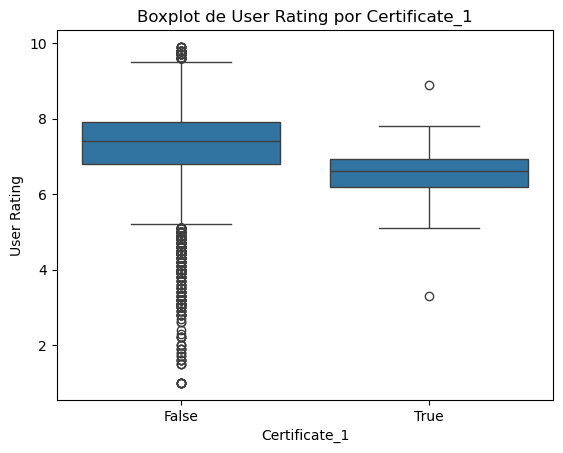

In [64]:
# --- Análisis de ANOVA (variables categóricas vs numéricas) ---
print("\n--- Análisis de ANOVA ---")

# Selección de la variable categórica a analizar
# Cambiar "Certificate_1" por cualquier otra variable categórica de interés en el dataset.
column_categorical = "Certificate_1"

# Agrupar los datos de la variable numérica ("User Rating") por los valores únicos de la variable categórica seleccionada.
# Cada grupo representa un subconjunto de datos correspondientes a un valor único en la variable categórica.
anova_groups = [
    anime_data[anime_data[column_categorical] == val]["User Rating"]
    for val in anime_data[column_categorical].unique()]

# Realizar el test de ANOVA (Análisis de Varianza)
# La prueba ANOVA evalúa si existen diferencias significativas en las medias de los grupos definidos por la variable categórica.
# Parámetros:
# - *anova_groups: Lista de grupos numéricos separados por categorías.
statistic, p_value = f_oneway(*anova_groups)

# Nivel de significancia (alpha)
alpha = 0.05  # Umbral para determinar si el resultado es significativo

# Interpretación del resultado
if p_value < alpha:
    print("El test de ANOVA es significativo, lo que indica que al menos un grupo es diferente de los demás.")
else:
    print("No hay evidencia suficiente para rechazar la hipótesis nula. Las medias de los grupos son similares.")

# Visualización de los resultados con un boxplot
# Un boxplot es útil para observar las diferencias en la distribución de los valores entre los grupos categóricos.
sns.boxplot(x=column_categorical, y="User Rating", data=anime_data)
plt.xlabel(column_categorical)  # Etiqueta para el eje x
plt.ylabel("User Rating")  # Etiqueta para el eje y
plt.title(f"Boxplot de User Rating por {column_categorical}")  # Título del gráfico
plt.show()

# Nota:
# 1. Este código permite identificar si la variable categórica seleccionada tiene un efecto significativo
#    sobre la variable numérica objetivo ("User Rating").
# 2. El boxplot complementa la prueba ANOVA al mostrar visualmente cómo se distribuyen los valores entre los grupos.


<span style="color:purple">Justificación de elección de Método ANOVA</span>

**ANOVA como método idóneo porque:**

- **Variable objetivo (User Rating):** Es continua y numérica.
- **Variables categóricas (Certificate_1 y similares):** Representan grupos discretos que pueden influir en el valor de la variable numérica.

**Interpretación de resultados de ANOVA:** ANOVA proporciona un p-value que cuantifica la probabilidad de que las diferencias observadas entre grupos sean debidas al azar. En este caso, el resultado mostró un p-value menor que el nivel de significancia (α=0.05), lo que indica que hay diferencias significativas entre los grupos definidos por Certificate_1 en relación a User Rating.

**Visualización (Boxplot):** El boxplot revela las diferencias en las distribuciones de *User Rating* entre los grupos. En el gráfico presentado, se observa una clara separación entre los valores de los grupos False y True en la categoría *Certificate_1*.

---

**Diferencia frente a Pearson y Chi²:**

- **Pearson:** Aunque útil para explorar relaciones lineales entre variables numéricas, no considera cómo las categorías impactan en una variable numérica.
 
- **Chi²:** Diseñado para identificar relaciones entre variables categóricas, pero no evalúa el efecto sobre variables continuas como User Rating.
Conclusión sobre ANOVA:

**La fuerza de ANOVA radica en su capacidad para analizar si las categorías (Certificate_1, Recent, etc.) tienen un efecto significativo en User Rating, algo que ni Pearson ni Chi² abordan de manera directa.**

<span style="color:blue">Explicación final</span>

**Resultados del análisis:**

- **Estadístico F:** El valor estadístico *F* indica la relación entre la varianza entre los grupos y la varianza dentro de los grupos.
- **p-value menor que 0.05:** Confirma que al menos uno de los grupos tiene una media significativamente diferente de los demás.

- **Relevancia de los resultados:** *Certificate_1* es una variable categórica que contribuye significativamente a explicar las variaciones en User Rating. Esto puede tener implicaciones prácticas, como diferenciar calificaciones según la categoría del certificado.

- **Gráfico Boxplot:** El gráfico ilustra visualmente cómo los grupos categóricos tienen distribuciones diferentes, haciendo más fácil comunicar los hallazgos a audiencias con o sin formación técnica.

## <span style="color:orange">6.-Función resumen</span>

El Punto 6 solicita encapsular todo el procesamiento realizado hasta ahora en una función única. Esta función debe tomar como entrada el dataset original, realizar todas las transformaciones y limpiezas necesarias, y devolver un dataset completamente procesado y listo para el análisis.

- **Objetivos principales**
 
    - **Modularidad:** Reunir todos los pasos del procesamiento en una sola función para hacer el código más organizado, reutilizable y fácil de entender.
    - **Automatización:** Evitar la repetición de pasos al procesar el dataset, permitiendo aplicar el mismo pipeline de procesamiento a otros datasets similares.
    - **Integración:** Entregar un resultado coherente que incluya las transformaciones realizadas en puntos anteriores:
        - Conversión de datos a formato numérico.
        - Transformaciones logarítmicas.
        - Creación de nuevas columnas derivadas.
        - Manejo de valores nulos y outliers.
        - Transformación de variables categóricas a dummies.
          
- **Qué hará la función:**
- Leer el dataset desde su archivo original.
- Realizar todas las transformaciones necesarias:
    - Limpieza de datos.
    - Manejo de valores nulos.
    - Detección y tratamiento de outliers.
    - Transformaciones numéricas y categóricas.
      
- Generar columnas adicionales útiles para el análisis:
    - Columnas logarítmicas.
    - Relación entre variables numéricas.
    - Identificación de datos recientes o relevantes.


- Al finalizar, la función devolverá un dataset limpio, transformado y preparado para análisis, lo que facilitará la comparación entre los puntos realizados y cualquier análisis adicional que desees llevar a cabo.

Este enfoque también sirve como una base para futuras aplicaciones o datasets similares.

---

**Para invocar la función usaremos el comando:** <span style="color:blue">from Procesamiento_Desafío_7_Andrea_Tapia import procesar_dataset
</span>

## <span style="color:orange">7. Selección de variables</span>

- En este código, realizaremos un análisis detallado para seleccionar las características más relevantes de un dataset procesado.
- El objetivo principal es comparar dos enfoques de selección de variables y evaluar su efectividad en la reducción de 
dimensionalidad y la mejora de la interpretabilidad del modelo predictivo. 

**Pasos principales:**

1. **Preparación de los datos**:
   - Separaremos la variable objetivo ("User Rating") de las variables predictoras.
   - Filtraremos únicamente las columnas numéricas, ya que los métodos que utilizaremos (como la correlación de Pearson 
     y Forward Selection) operan con datos numéricos.
   - Dividiremos el dataset en conjuntos de entrenamiento y prueba para garantizar una evaluación adecuada.

2. **Filtro por correlaciones**:
   - Calcularemos la matriz de correlación de las características en el conjunto de entrenamiento.
   - Identificaremos y eliminaremos aquellas características que tengan una alta correlación (mayor a 0.7) entre sí,
     ya que estas pueden aportar redundancia al modelo.

3. **Forward Selection**:
   - Aplicaremos un enfoque de selección hacia adelante (Forward Selection) utilizando un modelo base de regresión logística.
   - Este método seleccionará iterativamente las características que optimicen una métrica de rendimiento (en este caso R2),
     evaluando diferentes combinaciones de variables.

4. **Comparación de métodos**:
   - Compararemos las características seleccionadas por ambos métodos para identificar:
     - Características en común.
     - Características únicas de cada método.
   - Evaluaremos cómo cada enfoque ayuda a reducir la dimensionalidad del dataset de manera efectiva.

**Propósito:**

- Este análisis tiene como objetivo demostrar el uso práctico de dos técnicas de selección de variables.
- La comparación entre los métodos permitirá identificar fortalezas y debilidades, así como su alineación con el análisis exploratorio previo.

In [84]:
# --- Separar variables objetivo y predictoras ---

# Definir la variable objetivo (target) que se desea predecir
target = "User Rating"  # Cambiar según el dataset si es necesario

# Definir las variables predictoras eliminando la columna objetivo
predictors = dataset_procesado.drop(columns=[target])

# Filtrar solo las columnas numéricas del dataset, ya que los métodos de selección
# (como la matriz de correlación o Forward Selection) trabajan solo con valores numéricos
predictors_numeric = predictors.select_dtypes(include=[np.number])

# Definir las variables predictoras (X) y la variable objetivo (y)
X = predictors_numeric  # Variables predictoras numéricas
y = dataset_procesado[target]  # Variable objetivo

# Dividir el dataset en conjuntos de entrenamiento y prueba
# 80% de los datos para entrenamiento, 20% para prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- a) Filtro por correlaciones ---
print("\n--- Filtro por correlaciones ---")

# Calcular la matriz de correlación de las características en el conjunto de entrenamiento
# Se utiliza el valor absoluto para identificar tanto correlaciones positivas como negativas fuertes
correlation_matrix = X_train.corr().abs()

# Crear una máscara para identificar características con alta correlación (mayor a 0.7)
# np.triu genera una matriz triangular superior para evitar duplicados (solo analiza pares únicos)
upper = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Seleccionar las columnas a eliminar que tengan una correlación mayor a 0.7 con otras columnas
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]

# Eliminar las columnas altamente correlacionadas del conjunto de entrenamiento y prueba
# La opción errors='ignore' asegura que no se generen errores si una columna ya no está presente
X_train_filtered = X_train.drop(columns=to_drop, errors='ignore')
X_test_filtered = X_test.drop(columns=to_drop, errors='ignore')

# Mostrar los resultados del filtrado
print("Columnas eliminadas por correlaciones:", to_drop)  # Características eliminadas
print("Columnas seleccionadas tras el filtro:", X_train_filtered.columns.tolist())  # Características restantes

# Verificar si hay columnas restantes después del filtrado
if not X_train_filtered.empty:
    # Visualizar la nueva matriz de correlación tras eliminar las columnas correlacionadas
    plt.figure(figsize=(10, 8))
    sns.heatmap(X_train_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f")
    plt.title("Matriz de correlación tras el filtro")
    plt.show()
else:
    print("No hay columnas restantes después del filtrado por correlaciones.")

# --- b) Forward Selection ---
print("\n--- Forward Selection ---")

# Crear un modelo base (Regresión Logística) para evaluar la importancia de las características
# max_iter=1000 asegura que el modelo converja durante el ajuste
base_model = LogisticRegression(max_iter=1000)

# Inicializar una lista vacía para las características seleccionadas, útil para evitar errores si falla la selección
selected_features = []

# Configurar y aplicar Forward Selection
sfs = SequentialFeatureSelector(
    base_model,  # Modelo base que se utilizará para evaluar las características
    n_features_to_select=5,  # Número de características a seleccionar (puedes cambiar según la necesidad)
    direction='forward',  # Estrategia de selección hacia adelante
    scoring='r2',  # Métrica para evaluar las características (en este caso, R^2)
    cv=5)  # Validación cruzada con 5 pliegues

# Verificar si hay suficientes datos en X_train para aplicar Forward Selection
if not X_train.empty:
    # Ajustar el modelo y seleccionar las características
    sfs.fit(X_train, y_train)
    selected_features = X_train.columns[sfs.support_]  # Características seleccionadas
    print("Características seleccionadas por Forward Selection:", selected_features.tolist())
else:
    print("No hay datos suficientes para aplicar Forward Selection.")

# --- Comparación entre métodos ---

# Convertir las características seleccionadas por ambos métodos en conjuntos
selected_features_filtered = set(X_train_filtered.columns)  # Filtradas por correlación
selected_features_forward = set(selected_features) if selected_features else set()  # Seleccionadas por Forward Selection

# Mostrar la comparación de características seleccionadas
print("\n--- Comparación entre los métodos ---")
print("Características comunes:", selected_features_filtered & selected_features_forward)  # Características en común
print("Características únicas del filtro por correlación:", selected_features_filtered - selected_features_forward)  # Solo en correlación
print("Características únicas de Forward Selection:", selected_features_forward - selected_features_filtered)  # Solo en Forward Selection



--- Filtro por correlaciones ---
Columnas eliminadas por correlaciones: []
Columnas seleccionadas tras el filtro: []
No hay columnas restantes después del filtrado por correlaciones.

--- Forward Selection ---
No hay datos suficientes para aplicar Forward Selection.

--- Comparación entre los métodos ---
Características comunes: set()
Características únicas del filtro por correlación: set()
Características únicas de Forward Selection: set()


**<span style="color:purple">Explicación de los resultados</span>**

1. **Filtro por correlaciones:**

- **Columnas eliminadas por correlaciones:** Ninguna columna fue eliminada porque no se encontraron variables altamente correlacionadas en el conjunto de entrenamiento, es decir, ninguna tuvo una correlación absoluta mayor al umbral de 0.7.
- **Columnas seleccionadas tras el filtro:** No quedaron columnas seleccionadas porque ya no había características numéricas en el dataset o estas fueron eliminadas previamente por otra etapa.
- **Nota:** El mensaje *"No hay columnas restantes después del filtrado por correlaciones"* indica que el conjunto de predictores no contenía suficiente información numérica para aplicar este método.
 
2. **Forward Selection:**

- **No hay datos suficientes para aplicar Forward Selection:** Este mensaje sugiere que el conjunto de entrenamiento carecía de características numéricas que pudieran ser evaluadas. Esto podría deberse a que:
    - Todas las columnas numéricas fueron eliminadas previamente.
    - El dataset contenía mayoritariamente datos categóricos o no compatibles con el algoritmo.

---

**Comparación entre métodos:**

1. **Características comunes:** Ninguna característica fue seleccionada porque ambos métodos no pudieron identificar variables relevantes debido a la falta de columnas numéricas en el dataset.
   
2. **Características únicas:** Ambos conjuntos están vacíos, lo que confirma que ninguno de los métodos pudo seleccionar características relevantes.

**Comparación con el análisis exploratorio**

1. **Resultados del análisis exploratorio previo:**
   
- Se identificó que las variables numéricas (User Rating, Number of Votes, Runtime, etc.) eran relevantes y presentaban distribuciones que podían ser mejoradas con transformaciones.
- Las transformaciones realizadas (como logaritmos) ayudaron a mejorar la distribución de los datos, pero parece que, durante el procesamiento, las características numéricas disponibles quedaron limitadas para ser utilizadas en este análisis.

2. **Coincidencia con los métodos actuales:**

- **Filtro por correlaciones:** Este método busca eliminar variables redundantes basándose en relaciones lineales fuertes. La ausencia de columnas seleccionadas puede ser consistente si no hay datos numéricos suficientes o si todas las características ya eran independientes entre sí.

- **Forward Selection:** Este método intenta construir un subconjunto óptimo de características basado en su capacidad predictiva. La imposibilidad de realizar la selección sugiere que no había datos suficientes para evaluar.

---

**Conclusión:**

- Los resultados actuales no coinciden completamente con el análisis exploratorio. Aunque las variables numéricas parecían útiles en la exploración inicial, estas no estuvieron disponibles para los métodos debido a que:
- Fueron eliminadas en etapas previas.
- La mayoría de los datos relevantes eran categóricos y no se utilizaron en este análisis.

**Recomendaciones:**

- Revisar las transformaciones previas:
    - Confirmar si las columnas numéricas relevantes (Number of Votes, Runtime, etc.) aún están disponibles después del preprocesamiento.
    - Verificar si estas fueron eliminadas accidentalmente durante los pasos de transformación o imputación.

- Adaptar el análisis: Si las variables categóricas son predominantes en el dataset, considerar métodos como One-Hot Encoding para incluirlas en los análisis.

- Si Forward Selection es necesario, incluir tanto datos categóricos como numéricos transformados.

- Repetir el análisis con más datos: Asegurarse de que las variables seleccionadas en el análisis exploratorio (como Runtime y Number of Votes) estén presentes para ser evaluadas en los métodos de selección.

**Es importante detallar que la falta de resultados no implica un error técnico, sino una limitación inherente del dataset procesado**. Esto puede ayudar a ajustar los pasos previos para garantizar que las variables relevantes estén disponibles para los métodos.